## Rent Prediction Model

In this notebook a rent appraisal model is built using sci-kit learn 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [22]:
df1=pd.read_csv("zoocasa.csv")

In [23]:
df1.shape

(17318, 34)

In [24]:
#Removing outliers
q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df2 = df1.loc[(df1['Price'] > fence_low) & (df1['Price'] < fence_high)]

In [25]:
df2.shape

(15933, 34)

In [26]:
df=df2.loc[df2['GEO_NAME'].isin(['Toronto','Burlington','Milton','Mississauga','Brampton','Caledon','King','Vaughan',
                                 'Markham','Whitchurch-Stouffville','Pickering','Ajax','Whitby','Oshawa','Clarington','Newmarket',
                                 'Richmond Hill','East Gwillimbury','Oakville','Aurora','Brock', 'Uxbridge', 'Scugog','Georgina',
                                 'Halton Hills'])]

In [27]:
df.shape

(14662, 34)

In [28]:
df = df[pd.notnull(df['Size'])]

In [29]:
df.shape

(5671, 34)

In [ ]:
df.isnull().sum()

In [ ]:
print(df.columns.values)

In [ ]:
print(df.dtypes)

The heat map show the columns that have NULL values

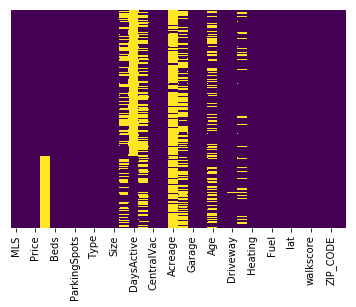

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
df.drop(['Acreage'],axis=1,inplace=True)
df.drop(['DateAvailable'],axis=1,inplace=True)
df.drop(['DaysActive'],axis=1,inplace=True)
df.drop(['LaundryLevel'],axis=1,inplace=True)
df.drop(['Age'],axis=1,inplace=True)
df.drop(['Description'],axis=1,inplace=True)
df.drop(['LotSize'],axis=1,inplace=True)
df.drop(['ListPrice'],axis=1,inplace=True)
df.drop(['Size'],axis=1,inplace=True)
df.drop(['Exterior'],axis=1,inplace=True)
df.drop(['Basement'],axis=1,inplace=True)
df.drop(['Driveway'],axis=1,inplace=True)
df.drop(['lat'],axis=1,inplace=True)
df.drop(['lng'],axis=1,inplace=True)
df.drop(['lat_lng'],axis=1,inplace=True)
df.drop(['Fuel'],axis=1,inplace=True)
df.drop(['ZIP_CODE'],axis=1,inplace=True)
df.drop(['AC'],axis=1,inplace=True)
df.drop(['Levels'],axis=1,inplace=True)
df.drop(['Garage'],axis=1,inplace=True)
df.drop(['MLS'],axis=1,inplace=True)
df.drop(['Address'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [36]:
#Fill missing values
df['GarageSpaces']=df['GarageSpaces'].fillna(df['GarageSpaces'].mode()[0])
df['Heating']=df['Heating'].fillna(df['Heating'].mode()[0])

Below is a correlation matrix showing the strength of the relationship between continuous variables

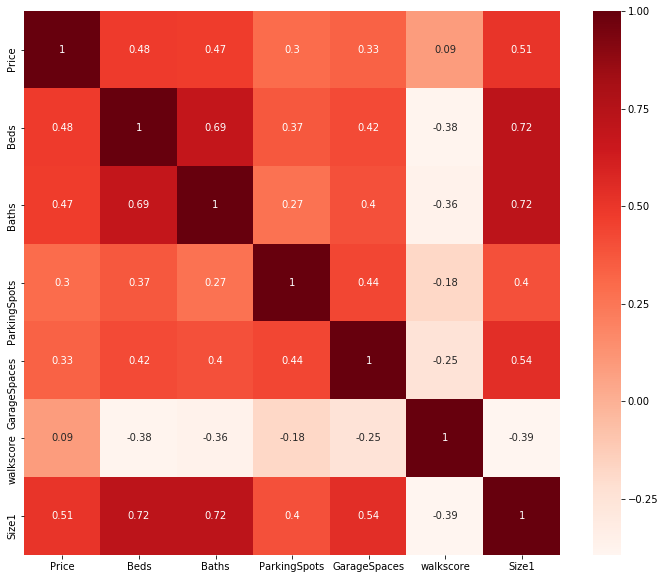

In [37]:
#Using Pearson Correlation
x=plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
x.savefig('test.png', dpi=100)

In [42]:
# Assuming same lines from your example
cols_to_norm = ['Beds','Baths','ParkingSpots','GarageSpaces','Size1','walkscore']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [43]:
dummies=pd.get_dummies(df.GEO_NAME)
dummies1=pd.get_dummies(df.Heating)
dummies2=pd.get_dummies(df.CentralVac)
dummies3=pd.get_dummies(df.Fireplace)
dummies4=pd.get_dummies(df.Type)

In [44]:
merged=pd.concat([df,dummies,dummies1,dummies2,dummies3,dummies4],axis="columns")

In [45]:
final=merged.drop(['GEO_NAME','Clarington','Heating','Heat Pump','CentralVac','No','Fireplace','No','Type','Triplex'],axis="columns")

In [46]:
#final=merged.drop(['GEO_NAME','Clarington','Heating','Heat Pump','CentralVac','No','Fireplace','No'],axis="columns")

In [47]:
X=final.drop('Price',axis='columns')
y=final.Price

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [69]:
model=LinearRegression()

In [70]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
y_pred=model.predict(X_test)

In [72]:
model.score(X_test,y_test)*100

65.6655867349408

In [73]:
r2_score(y_test,y_pred)*100

65.6655867349408

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

The scatter plot below shows the comparison between the actual and predicted values

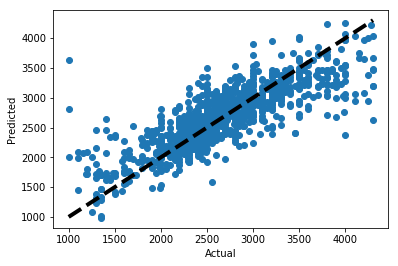

In [75]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 249.7588444806324
Mean Squared Error: 124621.81859271988
Root Mean Squared Error: 353.0181561799901


In [75]:
pd.DataFrame(df).to_csv("result.csv", index = False, encoding = "UTF-8")